In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
quad_times0 = pd.read_csv("results/knn_time/T2/q0.01/quad/quad_knn_vs_k_low.csv")
quad_times1 = pd.read_csv("results/knn_time/T2/q0.01/quad/knn_vs_k_low+1.csv")
quad_times2 = pd.read_csv("results/knn_time/T2/q0.01/quad/knn_vs_k_mid.csv")
quad_times3 = pd.read_csv("results/knn_time/T2/q0.01/quad/knn_vs_k_high.csv")

In [30]:
quad_times3

,k,mean_us
0,900,1251.39
1,1000,1377.22
2,1100,1517.78
3,1200,1644.82
4,1300,1783.30
5,1400,1904.82
6,1500,2136.38
7,1600,2323.72
8,1700,2465.75
9,1800,2609.34


In [3]:
r_times0 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_low.csv")
r_times1 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_low+1.csv")
r_times2 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_mid.csv")
r_times3 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_high.csv")

In [4]:
rz_times0 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_low_z.csv")
rz_times1 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_low+1_z.csv")
rz_times2 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_mid_z.csv")
rz_times3 = pd.read_csv("results/knn_time/T2/q0.01/rtree/knn_vs_k_high_z.csv")

In [5]:
quad_times = pd.concat((quad_times0, quad_times1, quad_times2, quad_times3))
r_times = pd.concat((r_times0, r_times1, r_times2, r_times3))
rz_times = pd.concat((rz_times0, rz_times1, rz_times2, rz_times3))

In [6]:
from sklearn.linear_model import LinearRegression

In [11]:
quad_times.k.values

array([   2,    4,    6,    8,   10,   12,   14,   16,   18,   20,   22,
         24,   26,   28,   30,   32,   34,   36,   38,   40,   42,   44,
         46,   48,   50,   52,   54,   56,   58,   60,   62,   64,   66,
         68,   70,   72,   74,   76,   78,   80,   82,   84,   86,   88,
         90,   92,   94,   96,   98,  100,  102,  104,  106,  108,  110,
        112,  114,  116,  118,  120,  122,  124,  126,  128,  130,  132,
        134,  136,  138,  140,  142,  144,  146,  148,  150,  152,  154,
        156,  158,  160,  162,  164,  166,  168,  170,  172,  174,  176,
        178,  180,  182,  184,  186,  188,  190,  192,  194,  196,  198,
        200,  210,  220,  230,  240,  250,  260,  270,  280,  290,  300,
        310,  320,  330,  340,  350,  360,  370,  380,  390,  400,  415,
        430,  445,  460,  475,  490,  505,  520,  535,  550,  565,  580,
        595,  610,  625,  640,  655,  670,  685,  700,  715,  730,  745,
        760,  775,  790,  805,  820,  835,  850,  9

In [23]:
times = [quad_times, rz_times, r_times]
names = ["quad", "rz", "rstr"]

for name, time in zip(names, times):  
    lr = LinearRegression()
    lr.fit(time.k.values.reshape(-1,1), time.mean_us.values)
    print(name, lr.coef_.item())
    print(name, lr.intercept_.item())
    print()


quad 1.4178348328443509
quad 61.87778278352994

rz 1.4396229193440304
rz 228.2176324338477

rstr 1.5719073198361884
rstr 181.08706418950214



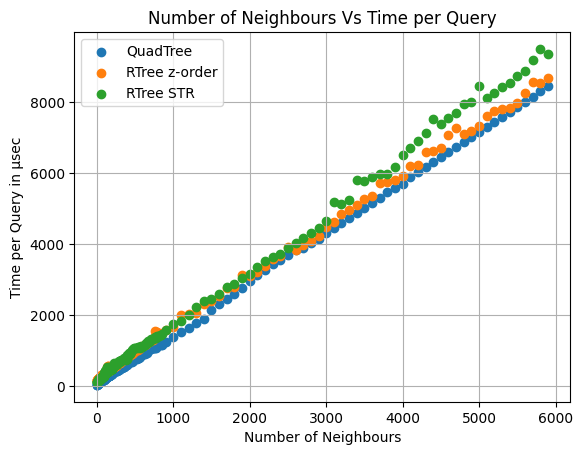

In [21]:
plt.scatter(quad_times.k, quad_times.mean_us, label = "QuadTree")
plt.scatter(rz_times.k, rz_times.mean_us, label = "RTree z-order")

plt.scatter(r_times.k, r_times.mean_us, label = "RTree STR")
plt.title("Number of Neighbours Vs Time per Query")
plt.xlabel("Number of Neighbours")
plt.ylabel("Time per Query in μsec")
plt.grid()
plt.legend()
plt.savefig("plots/trees_vs_k.png", bbox_inches="tight")

## T5

In [31]:
quad_times0 = pd.read_csv("results/knn_time/T5/quad/knn_vs_k_low.csv")
quad_times1 = pd.read_csv("results/knn_time/T5/quad/knn_vs_k_low+1.csv")
quad_times2 = pd.read_csv("results/knn_time/T5/quad/knn_vs_k_mid_high.csv")
quad_times = pd.concat((quad_times0, quad_times1, quad_times2))


In [38]:
rstr_times = pd.read_csv("results/knn_time/T5/rtree_str/knn_vs_k_s.csv")
rz_times = pd.read_csv("results/knn_time/T5/rtree_z/knn_vs_k_z.csv")

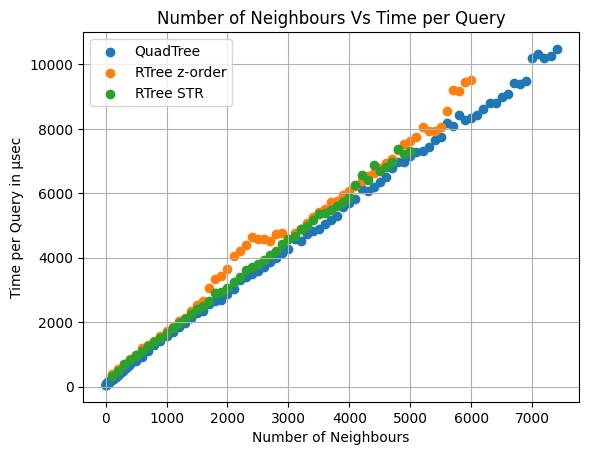

In [40]:
plt.scatter(quad_times.k, quad_times.mean_us, label = "QuadTree")
plt.scatter(rz_times.k, rz_times.mean_us, label = "RTree z-order")
plt.scatter(rstr_times.k, rstr_times.mean_us, label = "RTree STR")

plt.title("Number of Neighbours Vs Time per Query")
plt.xlabel("Number of Neighbours")
plt.ylabel("Time per Query in μsec")
plt.grid()
plt.legend()
plt.savefig("plots/trees_vs_k_T5.png", bbox_inches="tight")

In [52]:
rz_times_ = pd.concat((rz_times.iloc[:10], rz_times.iloc[16:-5]))

In [53]:
times = [quad_times, rz_times_, rstr_times]
names = ["quad", "rz", "rstr"]

for name, time in zip(names, times):  
    lr = LinearRegression()
    lr.fit(time.k.values.reshape(-1,1), time.mean_us.values)
    print(name, lr.coef_.item())
    print(name, lr.intercept_.item())
    print()

quad 1.397320124440165
quad 89.71107461244083

rz 1.4169175636393498
rz 526.0692952044665

rstr 1.447653708523409
rstr 218.62392326530698

